In [10]:
comscore = sc.textFile('/Users/lguan/Documents/data/comscore/comscore_with_score.txt')
good = comscore.filter(lambda x : x.split(',')[1] == '0')
bad = comscore.filter(lambda x : x.split(',')[1] == '1')

In [20]:
print 'sample: ', comscore.first()
print 'total ips: ', comscore.count()
print 'good: ', good.count()
print 'bad: ', bad.count()
print 'good ip with risk score', good.filter(lambda x : x.split(',')[3]).count()
print 'bad ip with risk score', bad.filter(lambda x : x.split(',')[3]).count()

sample:  212.179.77.105,1,4,
total ips:  92462
good:  45878
bad:  46584
good ip with risk score 246
bad ip with risk score 581


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


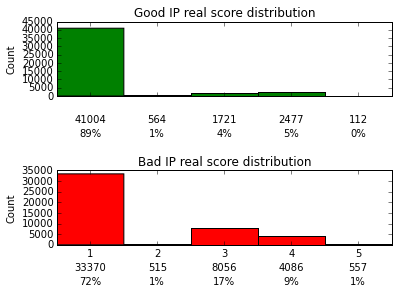

In [134]:
# real score distribution
%pylab inline
goodrealarray = array(good.map(lambda x : int(x.split(',')[2])).collect())
badrealarray = array(bad.map(lambda x : int(x.split(',')[2])).collect())

figure, subplt = plt.subplots(2, sharex = True)

abin = np.arange(6) + 0.5

counts, bins, patches = subplt[0].hist(goodrealarray, bins = abin, color = 'green')
subplt[0].set_xticks(bins)
subplt[0].set_title('Good IP real score distribution')
subplt[0].set_ylabel('Count')


# calculate count for each point, omit the point with count of zero
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    if count <= 0:
        continue
    subplt[0].annotate(str(int(count)), xy = (x, 0), xytext=(0, -18),
                      xycoords=('data', 'axes fraction'),
                      textcoords='offset points', va = 'top', ha = 'center') 
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    subplt[0].annotate(percent, xy = (x, 0), xytext=(0, -32),
                      xycoords=('data', 'axes fraction'),
                      textcoords='offset points', va = 'top', ha = 'center')



counts, bins, patches = subplt[1].hist(badrealarray, bins = abin, color = 'red')
subplt[1].set_title('Bad IP real score distribution')
#subplt[1].set_xlabel('Real Score')
subplt[1].set_ylabel('Count')

bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    if count <= 0:
        continue
    subplt[1].annotate(str(int(count)), xy = (x, 0), xytext=(0, -18),
                      xycoords=('data', 'axes fraction'),
                      textcoords='offset points', va = 'top', ha = 'center') 
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    subplt[1].annotate(percent, xy = (x, 0), xytext=(0, -32),
                      xycoords=('data', 'axes fraction'),
                      textcoords='offset points', va = 'top', ha = 'center')

plt.setp(subplt, xticks = range(6), xticklabels=range(6))
plt.xlim([0.5, 5.5])

figure.subplots_adjust(hspace = 1)

plt.show()

In [44]:
print min(goodrealarray), max(goodrealarray)

1 5


In [72]:
%pylab inline
import scipy.stats as stats
print stats.percentileofscore(goodrealarray, 1, 'rank')
print stats.percentileofscore(goodrealarray, 2, 'rank')
print stats.percentileofscore(goodrealarray, 3, 'rank')
print stats.percentileofscore(goodrealarray, 4, 'rank')
print stats.percentileofscore(goodrealarray, 5, 'rank')

Populating the interactive namespace from numpy and matplotlib
44.6891756397
89.9919351323
92.4822354941
97.0574131392
99.8790269846


In [114]:

print stats.percentileofscore(badrealarray, 1, 'rank')
print stats.percentileofscore(badrealarray, 2, 'rank')
print stats.percentileofscore(badrealarray, 3, 'rank')
print stats.percentileofscore(badrealarray, 4, 'rank')
print stats.percentileofscore(badrealarray, 5, 'rank')

35.8180920488
72.1878756655
81.387386227
94.4197578568
99.4032285763


In [115]:
print max(badrealarray)
print min(badrealarray)

5
1


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


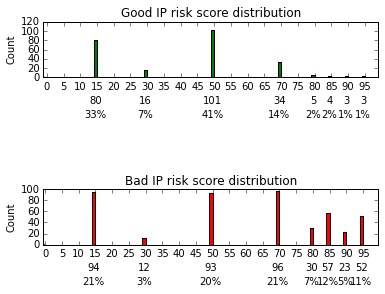

In [131]:
# risk score distribution

%pylab inline
goodriskarray = array(good.map(lambda x : x.split(',')[3]).filter(lambda x : x).map(lambda x : int(x)).collect())
badriskarray = array(bad.map(lambda x : x.split(',')[3]).filter(lambda x : x).map(lambda x : int(x)).collect())

# figure, subplt = plt.subplots(2, sharex = True)
figure, subplt = plt.subplots(2)

abin = np.arange(100)

counts, bins, patches = subplt[0].hist(goodriskarray, bins = abin, color='green')
subplt[0].set_title('Good IP risk score distribution')
# subplt[0].set_xlabel('Risk Score')
subplt[0].set_ylabel('Count')

# calculate count for each point, omit the point with count of zero
bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    if count <= 0:
        continue
    subplt[0].annotate(str(int(count)), xy = (x, 0), xytext=(0, -18),
                      xycoords=('data', 'axes fraction'),
                      textcoords='offset points', va = 'top', ha = 'center') 
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    subplt[0].annotate(percent, xy = (x, 0), xytext=(0, -32),
                      xycoords=('data', 'axes fraction'),
                      textcoords='offset points', va = 'top', ha = 'center')


counts, bins, patches = subplt[1].hist(badriskarray, bins = abin, color = 'red')

subplt[1].set_title('Bad IP risk score distribution')
# subplt[1].set_xlabel('Risk Score')
subplt[1].set_ylabel('Count')

bin_centers = 0.5 * np.diff(bins) + bins[:-1]
for count, x in zip(counts, bin_centers):
    if count <= 0:
        continue
    subplt[1].annotate(str(int(count)), xy = (x, 0), xytext=(0, -18),
                      xycoords=('data', 'axes fraction'),
                      textcoords='offset points', va = 'top', ha = 'center') 
    percent = '%0.0f%%' % (100 * float(count) / counts.sum())
    subplt[1].annotate(percent, xy = (x, 0), xytext=(0, -32),
                      xycoords=('data', 'axes fraction'),
                      textcoords='offset points', va = 'top', ha = 'center')

plt.setp(subplt, xticks = range(1, 101, 5), xticklabels=range(0, 100, 5))
plt.xlim([0.5, 100.5])

figure.subplots_adjust(hspace = 2)

plt.show()

In [93]:
# print goodriskarray
# print badriskarray

In [90]:
count

array([   0.,  218.,    0.,   12.,    0.,   93.,    0.,   96.,   87.,
       -506.,  124.,    0.,    0.,    0.,   94.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,   12.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,   93.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,   96.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,   30.,    0.,
          0.,    0.,    0.,   57.,    0.,    0.,    0.,    0.,   23.,
          0.,    0.,    0.,    0.,   52.,    0.,    0.,    0.,    0.])

In [94]:
goodriskarray

array([u'50', u'15', u'50', u'15', u'15', u'50', u'50', u'50', u'70',
       u'70', u'50', u'15', u'50', u'50', u'15', u'15', u'85', u'50',
       u'30', u'70', u'70', u'30', u'50', u'85', u'90', u'15', u'15',
       u'15', u'15', u'30', u'15', u'15', u'15', u'50', u'70', u'50',
       u'70', u'30', u'15', u'50', u'50', u'70', u'50', u'80', u'15',
       u'50', u'15', u'30', u'70', u'70', u'50', u'70', u'15', u'15',
       u'15', u'50', u'50', u'15', u'50', u'15', u'50', u'50', u'15',
       u'50', u'15', u'15', u'50', u'50', u'50', u'15', u'50', u'50',
       u'70', u'15', u'50', u'15', u'30', u'15', u'95', u'15', u'50',
       u'70', u'15', u'95', u'70', u'50', u'15', u'30', u'50', u'30',
       u'90', u'50', u'50', u'70', u'70', u'70', u'15', u'70', u'50',
       u'50', u'50', u'50', u'15', u'15', u'50', u'70', u'50', u'70',
       u'50', u'50', u'50', u'50', u'15', u'15', u'30', u'90', u'50',
       u'50', u'15', u'30', u'15', u'50', u'80', u'70', u'50', u'50',
       u'50', u'70',